## MLP

MLP para clasificar imagenes del dataset MNIST.

### 1. Cargar la base MNIST

In [1]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.datasets import mnist

# Importar el dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("El dataset MNIST tiene un conjunto de %d ejemplos para entrenamiento." % len(X_train))
print("El dataset MNIST tiene un conjunto de %d ejemplos para prueba." % len(X_test))

El dataset MNIST tiene un conjunto de 60000 ejemplos para entrenamiento.
El dataset MNIST tiene un conjunto de 10000 ejemplos para prueba.


In [2]:
X_test1 = X_test[:-10,:] # reservamos 10 imágenes para predicción
y_test1 = y_test[:-10]
X_predict = X_test[-10:,:] # las 10 imágenes para predicción

print("Base MNIST para entrenamiento con %d ejemplos" % len(X_train))
print("Base MNIST para pruebas con %d ejemplos" % len(X_test1))
print("%d Ejemplos para predicción" % len(X_predict))
X_train.shape

Base MNIST para entrenamiento con 60000 ejemplos
Base MNIST para pruebas con 9990 ejemplos
10 Ejemplos para predicción


(60000, 28, 28)

### 2. Visualizar lunas imágenes de entrenamiento

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# Visualicemos las 6 primeras imágenes de entrenamiento
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. Visualizar una imágen en más detalle

In [4]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[3], ax)

### 4. Re-escalar las imágenes dividiendo cada pixel de cada imágen para 255

In [5]:
# re-escalar [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test1 = X_test1.astype('float32')/255
X_predict = X_predict.astype('float32')/255

### 5. Codificar las etiquetas como categorías usando el esquema One-Hot 

In [6]:
# 5. Codificar las etiquetas en categorías usando One-Hot 

from tensorflow.keras.utils import to_categorical


# mostrar las primeras 10 etiquetas de entrenamiento (con valores enteros)
print('Etiquetas de las 10 primeras imágenes:')
print(y_train[:10])

Etiquetas de las 10 primeras imágenes:
[5 0 4 1 9 2 1 3 1 4]


In [7]:
# código one-hot de la etiqueta
y_train = to_categorical(y_train, 10)
y_test1 = to_categorical(y_test1, 10)

# mostrar las primeras 10 etiquetas de entrenameinto (one-hot)
print('Etiquetas de las 10 primeras imágenes en código one-hot:')
print(y_train[:10])

Etiquetas de las 10 primeras imágenes en código one-hot:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [8]:
X_train.shape

(60000, 28, 28)

### 6. Definición de la arquitectura del Modelo
Arquitectura:\
1 vector de entrada de 784 valores\
2 capas ocultas con 512 neuronas cada una; y, función de activación Relu\
1 capa de salida con 10 neuronas con función de activación Softmax

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# definición del modelo
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

### 7. Compilar el Modelo

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### 8. Sin entrenar todavía, sólo para comparar, calculemos la precisión del clasificador en el conjunto de prueba

In [11]:
# 8. Calcular la precisión del clasificador en el conjunto de pruebas (antes de entrenamiento)
# evaluar la precisión en el conjunto de prueba
score = model.evaluate(X_test1, y_test1, verbose=0)
accuracy = 100*score[1]

# mostrar la precisión del conjunto de prueba
print('Precisión en el conjunto de prueba: %.4f%%' % accuracy)

Precisión en el conjunto de prueba: 16.7868%


### 9. Entrenar el modelo

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint   

# entrenar el modelo
checkpointer = ModelCheckpoint(filepath='mnist.model.best.keras', verbose=1, save_best_only=True)

hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8493 - loss: 0.4670
Epoch 1: val_loss improved from None to 0.11876, saving model to mnist.model.best.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9195 - loss: 0.2595 - val_accuracy: 0.9641 - val_loss: 0.1188
Epoch 2/10
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9696 - loss: 0.0980
Epoch 2: val_loss improved from 0.11876 to 0.09532, saving model to mnist.model.best.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9720 - loss: 0.0923 - val_accuracy: 0.9710 - val_loss: 0.0953
Epoch 3/10
372/375 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9814 - loss: 0.0585
Epoch 3: val_loss improved from 0.09532 to 0.08642, saving model to mnist.model.best.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9812 - loss: 0.0598 - val_accuracy: 0.9749 - val_loss: 0.0864
Epoch 4/10
370/375 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9876 - loss: 0.0379 
Epoch 4: val_loss improved from

### 10. Cargar el modelo con la mejor precisión en el conjunto de validación 

In [13]:
# cargar la matriz de pesos que produjeron la mejor precisión
model.load_weights('mnist.model.best.keras')

### 11. Calcular la precisión de la clasificación en el conjunto de prueba

In [14]:
# evaluar = Test la precisión en el conjunto de prueba
score = model.evaluate(X_test1, y_test1, verbose=0)
accuracy = 100*score[1]

In [15]:
#mostrar la precisión en prubea
print('Precisión durante la prueba: %.4f%%' % accuracy)

Precisión durante la prueba: 98.0480%


In [16]:
# predicción con las 10 imágenes no vistas antes

result=model.predict(X_predict)
labels = (result > 0.5).astype(int)

print(labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
[[0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


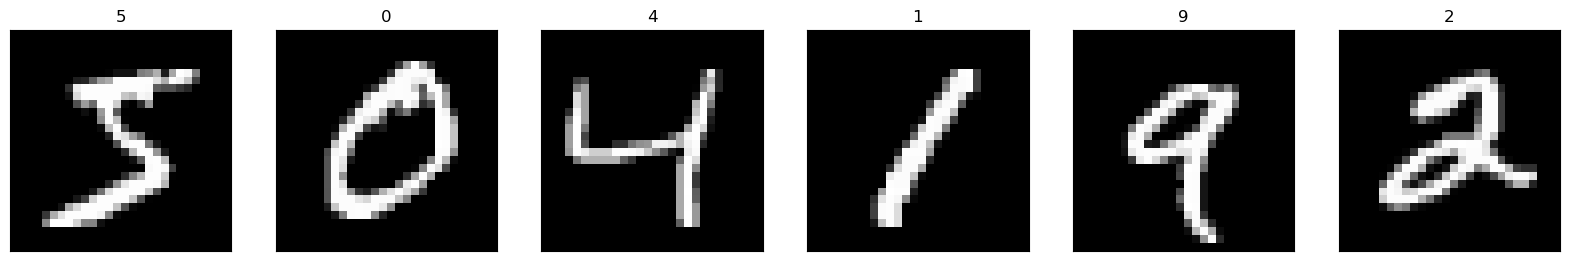

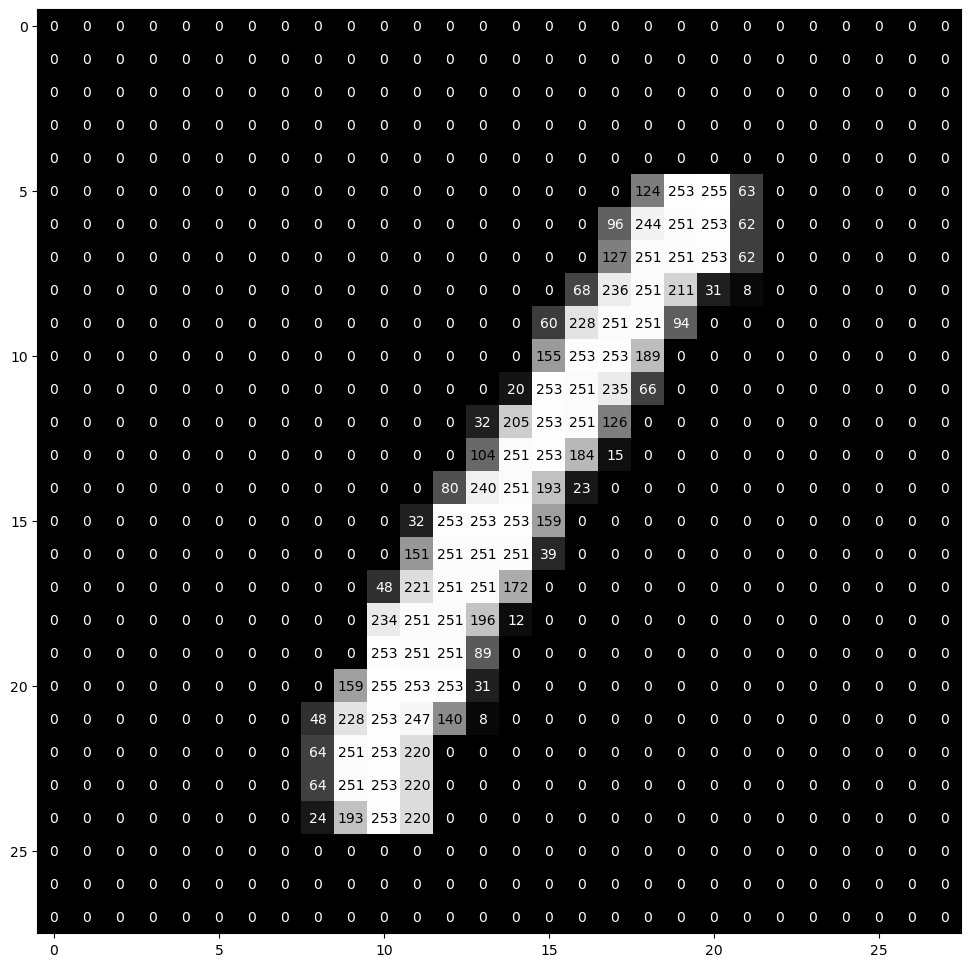

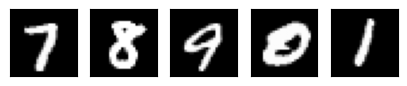

In [17]:
# graficar las 4 primeras imágenes nuevas
fig = plt.figure(figsize=(5,5))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_predict[i], cmap='gray')
plt.show()